In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as tt
import torch.utils as utils
from tensorflow.keras.datasets import mnist

In [2]:
def load_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape(-1, 784)
    x_train = x_train / 255.0
    x_test = x_test.reshape(-1, 784)
    x_test = x_test / 255.0
    return x_train, y_train, x_test, y_test

In [3]:
def softmax(z):
    exp = np.exp(z - np.max(z, axis = 1, keepdims = True))
    return exp / np.sum(exp, axis = 1, keepdims = True)

In [4]:
def loss(prob, y):
    m = y.shape[0]
    loss = -np.sum(y * np.log(prob + 1e-8)) / m
    return loss

In [5]:
def one_hot(labels):
    num_classes = np.max(labels) + 1
    encoded_labels = np.eye(num_classes)[labels]
    return encoded_labels


In [6]:
def grad(X, y, prob):
    m = y.shape[0]
    dTheta = np.dot(X.T, (prob - y)) / m
    db = np.mean(prob - y, axis = 0)
    return dTheta, db

In [7]:
def train(x, y, steps, lr):
    theta = np.random.rand(x_train.shape[1], y_train.shape[1]) /  (x_train.shape[1])
    b = np.random.rand(y.shape[1])
    #theta = np.zeros((x.shape[1], y.shape[1]))
    #b = np.zeros(y.shape[1])
    
    loss_history = np.zeros(steps)
    
    for i in range(steps):
        z = np.dot(x, theta) + b
        p = softmax(z)
        dTheta, db = grad(x, y, p)
        theta -= lr * dTheta
        b -= lr * db
        loss_history[i] = loss(p, y)
    return theta, b, loss_history


In [8]:
def accuracy(predictions, y):
    correct_predictions = np.argmax(predictions, axis=1) == np.argmax(y, axis=1)
    accuracy = np.mean(correct_predictions)
    return accuracy

In [9]:
x_train, y_train, x_test, y_test = load_mnist()
y1 = y_train
y_train = one_hot(y_train)
y2 = y_test
y_test = one_hot(y_test)
theta, b, loss_history = train(x_train, y_train, 1000, 0.1)

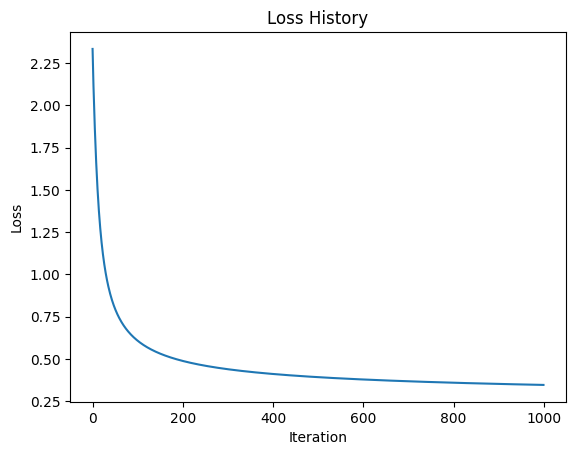

In [10]:
plt.plot(range(len(loss_history)), loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History')
plt.show() 

In [11]:
predictions = softmax(x_train @ theta + b)
accuracy(predictions, y_train)

0.9048833333333334

In [12]:
predictions = softmax(x_test @ theta + b)
accuracy(predictions, y_test)

0.9106

In [13]:
def predict(x, theta, b):
    p = softmax(np.dot(x, theta) + b)
    return np.argmax(p, axis=1)

In [14]:
train_preds = predict(x_train, theta, b)

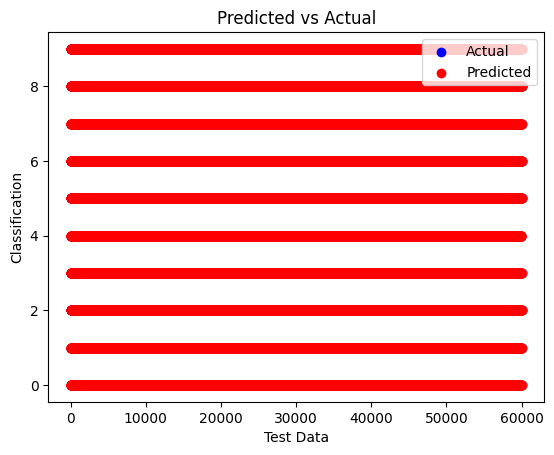

In [15]:
plt.scatter(range(len(y_train)), y1, color='blue', label='Actual')
plt.scatter(range(len(y_train)), train_preds, color='red', label='Predicted')
plt.xlabel('Test Data')
plt.ylabel('Classification')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()